In [9]:
import pandas as pd
from bnlearn import structure_learning, parameter_learning, inference
import bnlearn as bn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from bnlearn import plot

In [2]:
df = pd.read_csv("wine.data")

# Column names
column_names = ['class', 'alcohol', 'malicacid', 'ash', 'alcalinity', 'Mg', 'phenols', 'flav',
                'nonflav', 'proantho', 'clr_intensity', 'hue', '0D280_0D315', 'proline']

# Renaming
df.columns = column_names

In [43]:
df.describe()

,class,alcohol,malicacid,ash,alcalinity,Mg,phenols,flav,nonflav,proantho,clr_intensity,hue,0D280_0D315,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,1.050847,0.446328,1.118644,0.881356,0.468927,0.853107,0.604520,0.768362,0.587571,0.491525,0.694915,1.000000,0.508475
std,0.773991,0.717248,0.647285,0.535705,0.586343,0.564474,0.707833,0.585412,0.744307,0.597783,0.631724,0.561681,0.790569,0.691824
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [16]:
# Specify the number of bins and strategy
n_bins = 3
strategy = 'uniform'  

# Discretize each column
for column in df.columns:
    if column != 'class': 
        column_data = df[column].values.reshape(-1, 1)

        # Discretization
        discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
        df[column] = discretizer.fit_transform(column_data)

df.head()
df_new = df

In [5]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dataset = pd.concat([X_train, y_train], axis = 1)

# Learn Bayesian network structure
A = structure_learning.fit(df=dataset, scoretype='k2')


[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]


[bnlearn] >Compute structure scores for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


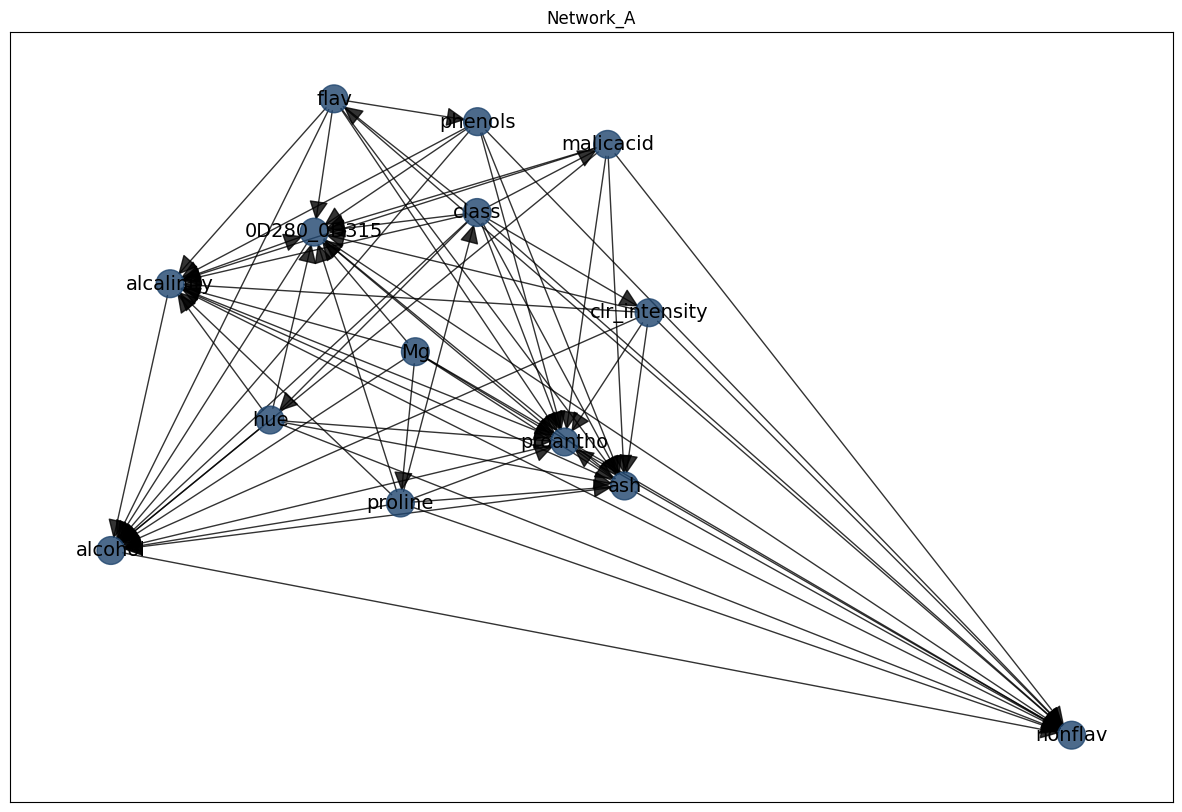

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'alcohol': array([-0.57953648, -0.41514137]),
  'malicacid': array([0.23714293, 0.42406201]),
  'ash': array([ 0.2649464 , -0.28182289]),
  'alcalinity': array([-0.48212322,  0.13612289]),
  'Mg': array([-0.07890971, -0.00436005]),
  'phenols': array([0.02323557, 0.47095617]),
  'flav': array([-0.21264411,  0.51818431]),
  'nonflav': array([ 1.        , -0.79673252]),
  'proantho': array([ 0.16654599, -0.19094101]),
  'clr_intensity': array([0.30532442, 0.07618237]),
  'hue': array([-0.31771241, -0.14550367]),
  '0D280_0D315': array([-0.24530451,  0.24277647]),
  'proline': array([-0.10351092, -0.31704603]),
  'class': array([0.02254604, 0.28326332])},
 'G': <networkx.classes.digraph.DiGraph at 0x19b377a28c0>,
 'node_properties': {'alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'malicacid': {'node_color': '#1f456e', 'node_size': 800},
  'ash': {'node_color': '#1f456e', 'node_size

In [6]:
bn.plot(model=A,node_size=400,title='Network_A')

In [7]:
# Learn Bayesian network parameters
model_A1 = parameter_learning.fit(model = A, df = dataset, scoretype='k2')

bn.print_CPD(model_A1,verbose=0)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of alcohol:
+---------------+-----+--------------------+
| 0D280_0D315   | ... | 0D280_0D315(2.0)   |
+---------------+-----+--------------------+
| Mg            | ... | Mg(2.0)            |
+---------------+-----+--------------------+
| alcalinity    | ... | alcalinity(2.0)    |
+---------------+-----+--------------------+
| ash           | ... | ash(2.0)           |
+---------------+-----+--------------------+
| class         | ... | class(3)           |
+---------------+-----+--------------------+
| clr_intensity | ... | clr_intensity(2.0) |
+---------------+-----+--------------------+
| flav          | ... | flav(2.0)          |
+---------------+-----+--------------------+
| hue           | ... | hue(2.0)           |
+---------------+-----+--------------------+
| malicacid   

{'alcohol':          alcohol  0D280_0D315   Mg  alcalinity  ash  class  clr_intensity  \
 0            0.0          0.0  0.0         0.0  0.0      1            0.0   
 1            0.0          0.0  0.0         0.0  0.0      1            0.0   
 2            0.0          0.0  0.0         0.0  0.0      1            0.0   
 3            0.0          0.0  0.0         0.0  0.0      1            0.0   
 4            0.0          0.0  0.0         0.0  0.0      1            0.0   
 ...          ...          ...  ...         ...  ...    ...            ...   
 1594318      2.0          2.0  2.0         2.0  2.0      3            2.0   
 1594319      2.0          2.0  2.0         2.0  2.0      3            2.0   
 1594320      2.0          2.0  2.0         2.0  2.0      3            2.0   
 1594321      2.0          2.0  2.0         2.0  2.0      3            2.0   
 1594322      2.0          2.0  2.0         2.0  2.0      3            2.0   
 
          flav  hue  malicacid  phenols  proantho  

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


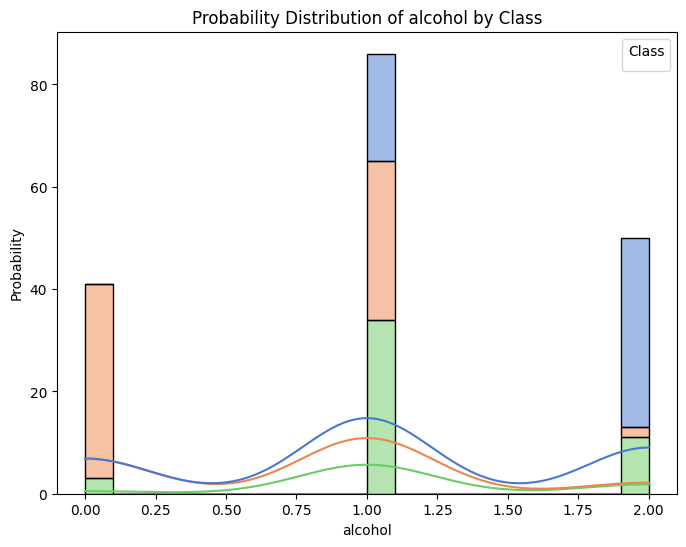

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


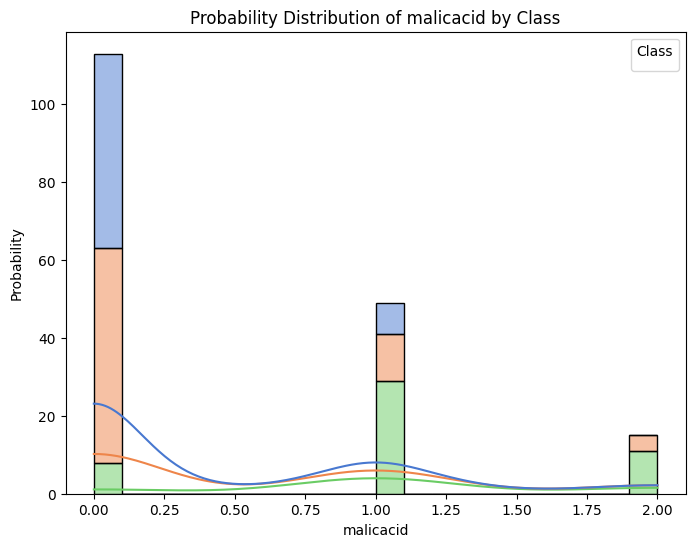

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


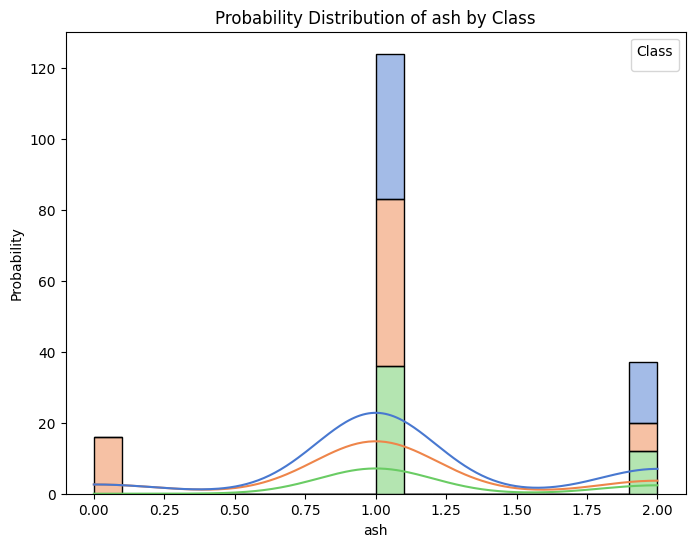

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


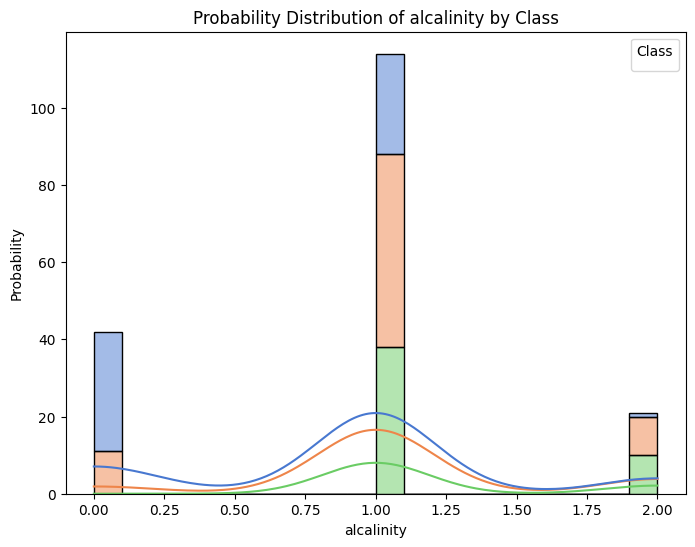

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


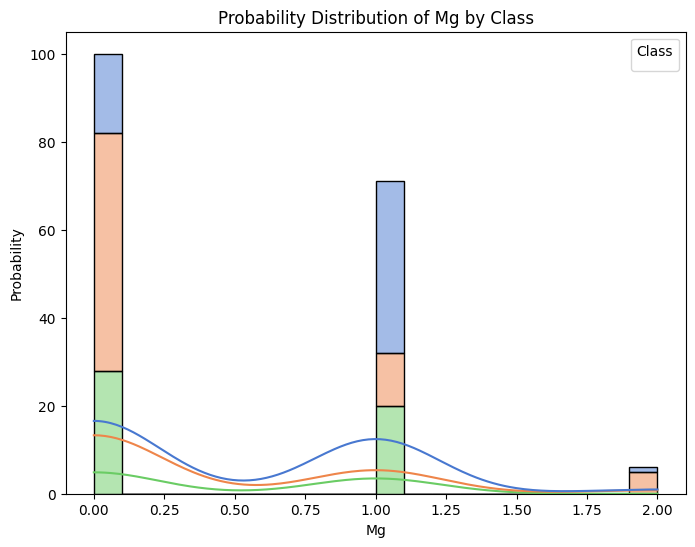

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


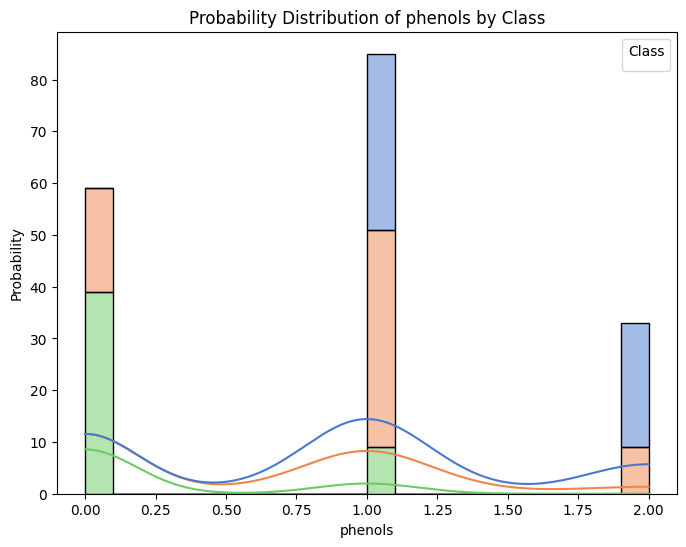

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


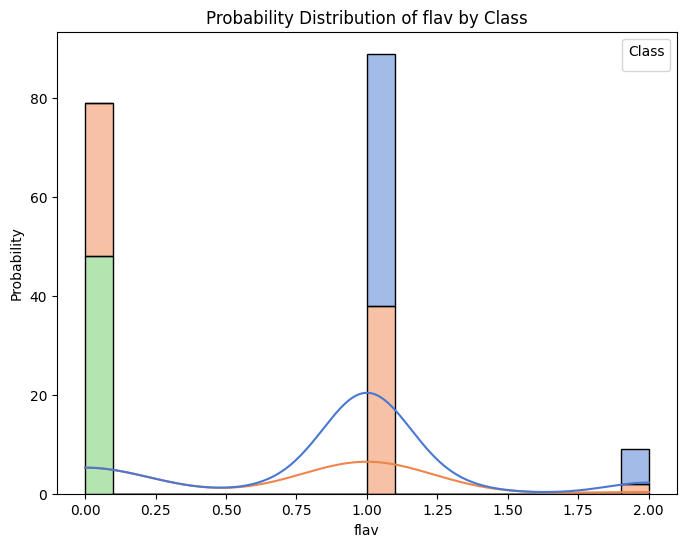

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


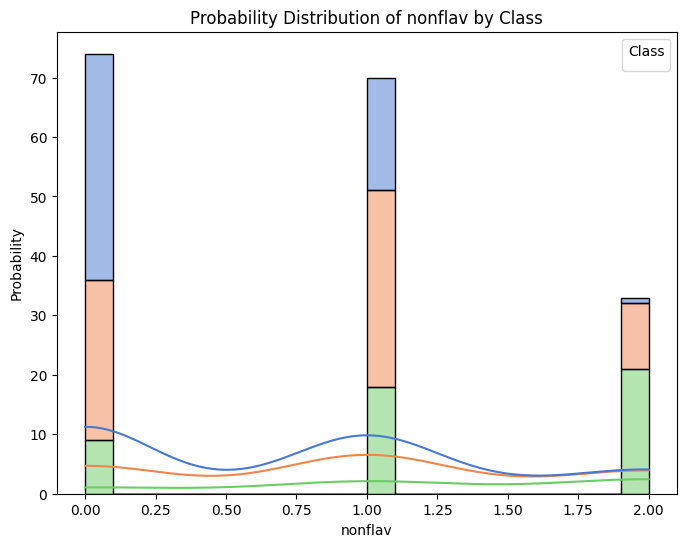

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


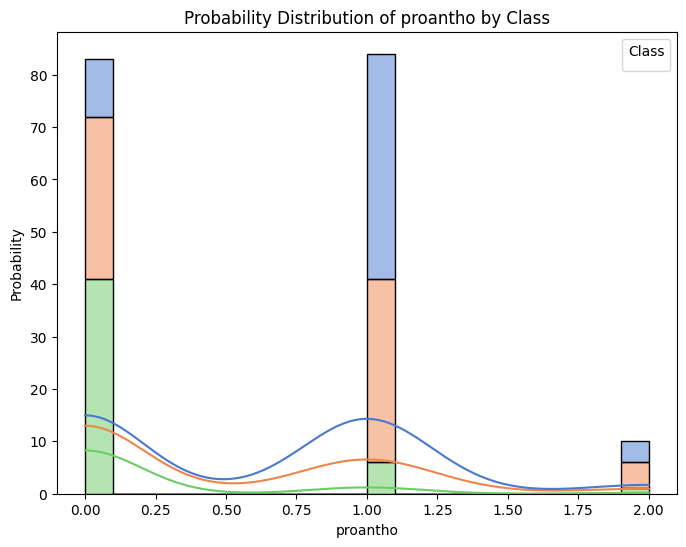

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


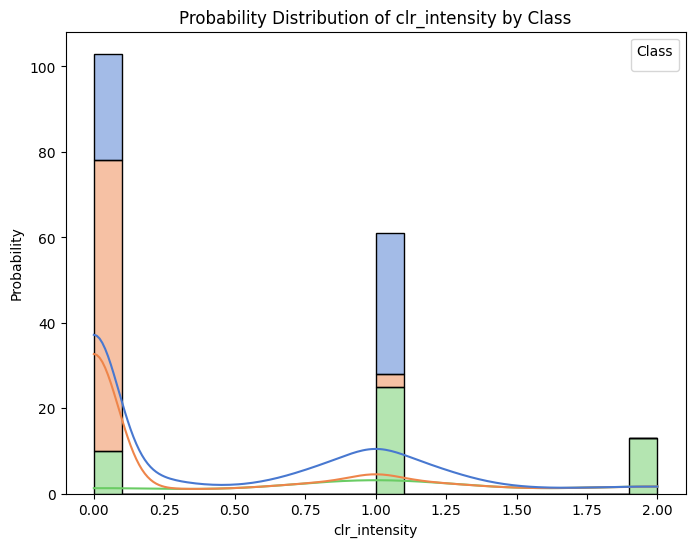

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


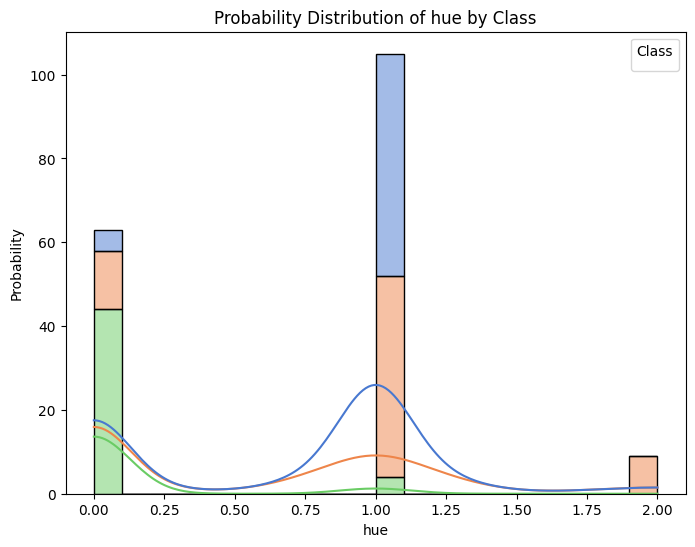

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


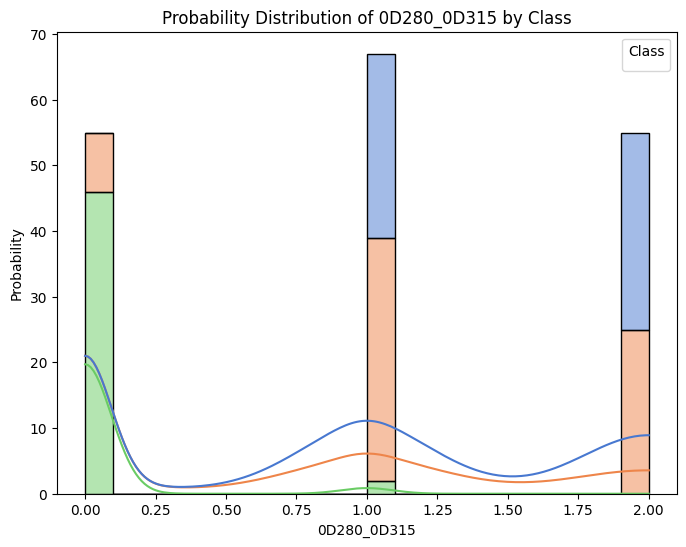

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


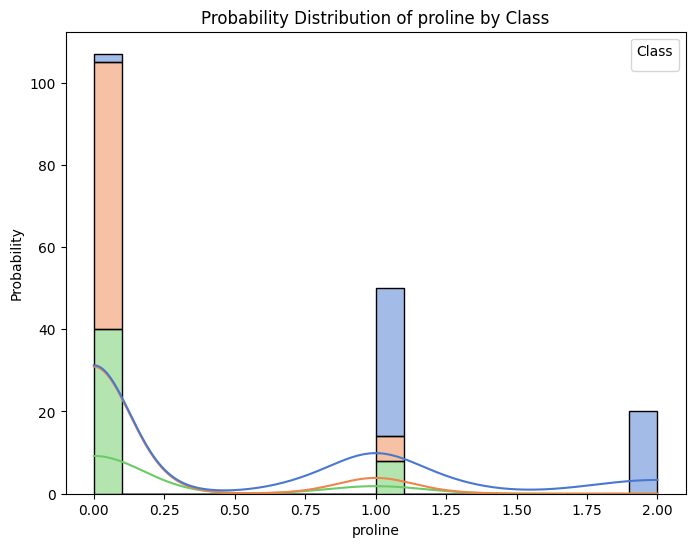

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

for variable in df.columns:
    if variable != 'class':  # Exclude the target variable
        plt.figure(figsize=(8, 6))

        # Use seaborn for nice probability density plots
        sns.histplot(data=df, x=variable, hue='class', kde=True, bins=20, multiple="stack", palette="muted")

        plt.title(f'Probability Distribution of {variable} by Class')
        plt.xlabel(variable)
        plt.ylabel('Probability')
        plt.legend(title='Class')
        plt.show()


[bnlearn] >Compute edge strength with [g_sq]
[bnlearn] >Edge [alcohol <-> nonflav] [P=0.217884] is excluded because it was not significant (P<0.01) with [g_sq]
[bnlearn] >Edge [malicacid <-> alcohol] [P=0.204676] is excluded because it was not significant (P<0.01) with [g_sq]
[bnlearn] >Edge [malicacid <-> ash] [P=0.0199399] is excluded because it was not significant (P<0.01) with [g_sq]
[bnlearn] >Edge [ash <-> alcohol] [P=0.207869] is excluded because it was not significant (P<0.01) with [g_sq]
[bnlearn] >Edge [ash <-> nonflav] [P=0.0965896] is excluded because it was not significant (P<0.01) with [g_sq]
[bnlearn] >Edge [ash <-> proantho] [P=0.760789] is excluded because it was not significant (P<0.01) with [g_sq]
[bnlearn] >Edge [ash <-> 0D280_0D315] [P=0.0743892] is excluded because it was not significant (P<0.01) with [g_sq]
[bnlearn] >Edge [alcalinity <-> alcohol] [P=0.0153606] is excluded because it was not significant (P<0.01) with [g_sq]
[bnlearn] >Edge [alcalinity <-> proanth

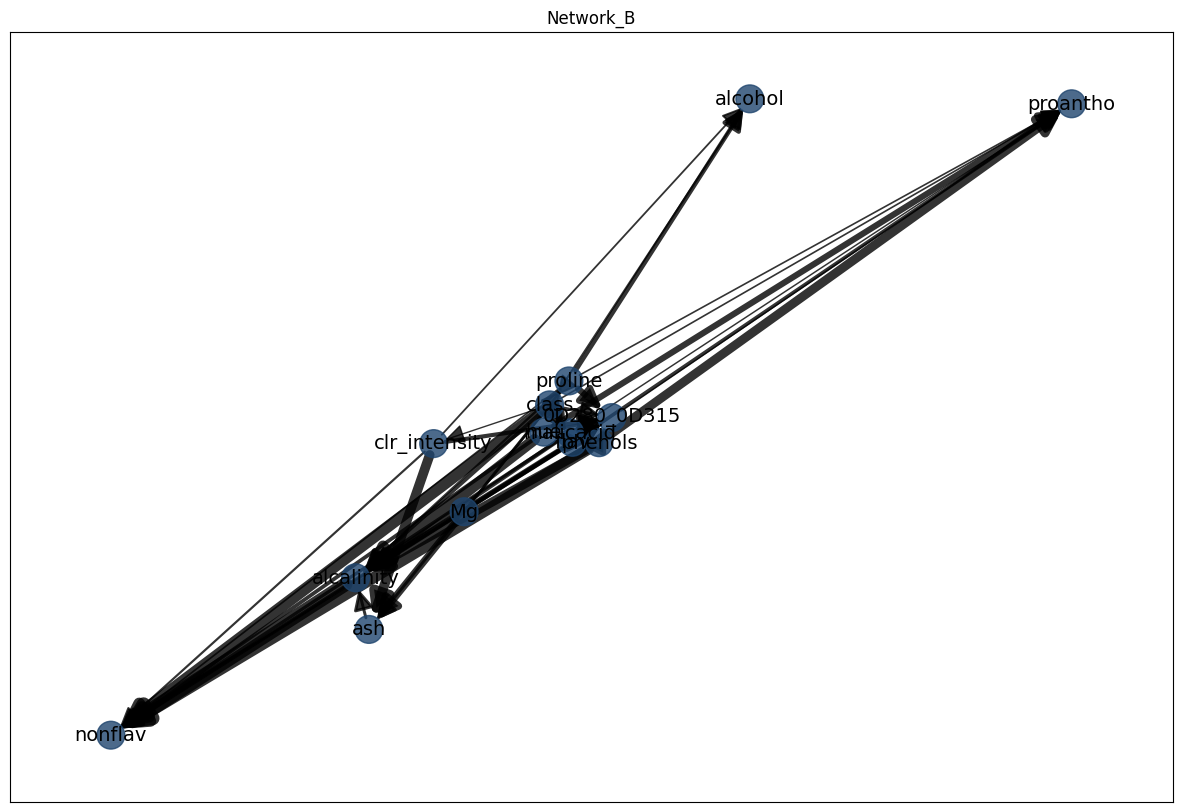

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'alcohol': array([0.25372398, 1.        ]),
  'malicacid': array([ 0.03511627, -0.00129222]),
  'ash': array([-0.2083951 , -0.59064254]),
  'alcalinity': array([-0.22457768, -0.43574983]),
  'Mg': array([-0.09289877, -0.23773124]),
  'phenols': array([ 0.07073016, -0.03083409]),
  'flav': array([ 0.03839942, -0.02974249]),
  'nonflav': array([-0.52145053, -0.90760866]),
  'proantho': array([0.6441056 , 0.98515735]),
  'clr_intensity': array([-0.12985761, -0.03354804]),
  'hue': array([0.0039609 , 0.00074585]),
  '0D280_0D315': array([0.08612372, 0.04434278]),
  'proline': array([0.03424539, 0.15432596]),
  'class': array([0.01077424, 0.08257717])},
 'G': <networkx.classes.digraph.DiGraph at 0x19b3ab4aad0>,
 'node_properties': {'alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'malicacid': {'node_color': '#1f456e', 'node_size': 800},
  'ash': {'node_color': '#1f456e', 'node_size': 8

In [41]:
B = bn.independence_test(model_A1, dataset, test='g_sq', alpha=0.01, prune=True)
bn.plot(model=B,node_size=400,title='Network_B')

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Warning: max_indegree only works in case of methodtype="tan"
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]


[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


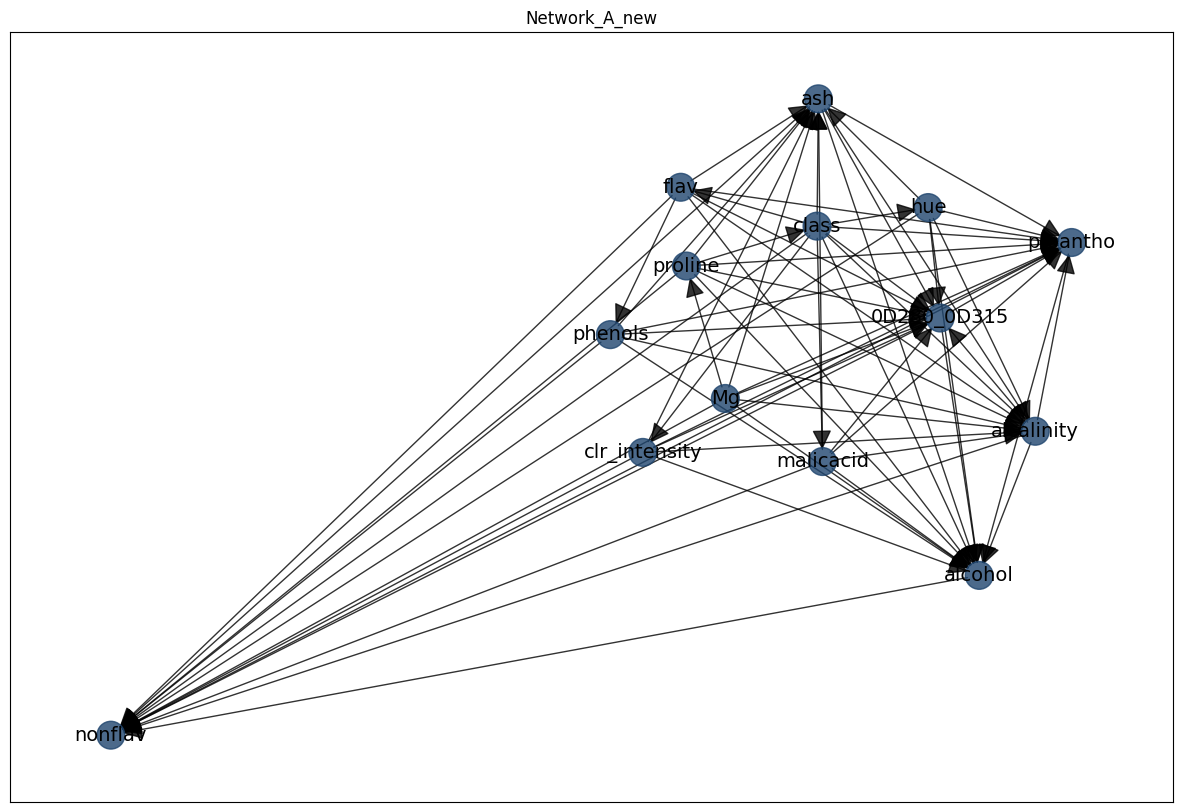

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'alcohol': array([ 0.30480172, -0.52470709]),
  'malicacid': array([ 0.06942341, -0.25661931]),
  'ash': array([0.06315678, 0.59722796]),
  'alcalinity': array([ 0.38905372, -0.18541985]),
  'Mg': array([-0.07665866, -0.10818153]),
  'phenols': array([-0.24947803,  0.04209266]),
  'flav': array([-0.14365213,  0.38900944]),
  'nonflav': array([-1.        , -0.90084214]),
  'proantho': array([0.44370524, 0.25899187]),
  'clr_intensity': array([-0.20065962, -0.23517658]),
  'hue': array([0.22817658, 0.34122229]),
  '0D280_0D315': array([0.24616317, 0.08122501]),
  'proline': array([-0.135148  ,  0.20366807]),
  'class': array([0.06111584, 0.29750921])},
 'G': <networkx.classes.digraph.DiGraph at 0x19b7fe51750>,
 'node_properties': {'alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'malicacid': {'node_color': '#1f456e', 'node_size': 800},
  'ash': {'node_color': '#1f456e', 'node_size':

In [17]:
# Assuming df is your dataset
A2 = structure_learning.fit(
    df=dataset,
    methodtype='hc',       # TAN (Tree Augmented Naive Bayes)
    class_node='class',     # Specify the target class node
    root_node='alcohol',    # Specify the root node for the tree structure
    scoretype='k2',         # Scoring metric (you can use other metrics like 'bdeu', 'bic', etc.)
)

# Plot the TAN structure
plot(A2, node_size=400, title='Network_A_new')

In [18]:
# Learn Bayesian network parameters
model_A2 = parameter_learning.fit(model = A2, df = dataset, scoretype='k2')

bn.print_CPD(model_A2,verbose=0)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of alcohol:
+---------------+-----+--------------------+
| 0D280_0D315   | ... | 0D280_0D315(2.0)   |
+---------------+-----+--------------------+
| Mg            | ... | Mg(2.0)            |
+---------------+-----+--------------------+
| alcalinity    | ... | alcalinity(2.0)    |
+---------------+-----+--------------------+
| ash           | ... | ash(2.0)           |
+---------------+-----+--------------------+
| class         | ... | class(3)           |
+---------------+-----+--------------------+
| clr_intensity | ... | clr_intensity(2.0) |
+---------------+-----+--------------------+
| flav          | ... | flav(2.0)          |
+---------------+-----+--------------------+
| hue           | ... | hue(2.0)           |
+---------------+-----+--------------------+
| malicacid   

{'alcohol':          alcohol  0D280_0D315   Mg  alcalinity  ash  class  clr_intensity  \
 0            0.0          0.0  0.0         0.0  0.0      1            0.0   
 1            0.0          0.0  0.0         0.0  0.0      1            0.0   
 2            0.0          0.0  0.0         0.0  0.0      1            0.0   
 3            0.0          0.0  0.0         0.0  0.0      1            0.0   
 4            0.0          0.0  0.0         0.0  0.0      1            0.0   
 ...          ...          ...  ...         ...  ...    ...            ...   
 1594318      2.0          2.0  2.0         2.0  2.0      3            2.0   
 1594319      2.0          2.0  2.0         2.0  2.0      3            2.0   
 1594320      2.0          2.0  2.0         2.0  2.0      3            2.0   
 1594321      2.0          2.0  2.0         2.0  2.0      3            2.0   
 1594322      2.0          2.0  2.0         2.0  2.0      3            2.0   
 
          flav  hue  malicacid  phenols  proantho  

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)
model = SelectFromModel(clf, prefit=True)
X_new = pd.DataFrame(model.transform(X),columns=X_train.columns[model.get_support()])

dataset_new = pd.concat([X_new, y_train],axis=1)

In [51]:
dataset_new.head()

,alcohol,clr_intensity,hue,0D280_0D315,proline,class
0,1.0,0.0,1.0,2.0,1.0,1.0
1,1.0,1.0,1.0,2.0,1.0,1.0
2,2.0,1.0,0.0,2.0,2.0,1.0
3,1.0,0.0,1.0,1.0,0.0,1.0
4,2.0,1.0,1.0,1.0,2.0,1.0


[bnlearn] >Warning: max_indegree only works in case of methodtype="tan"
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


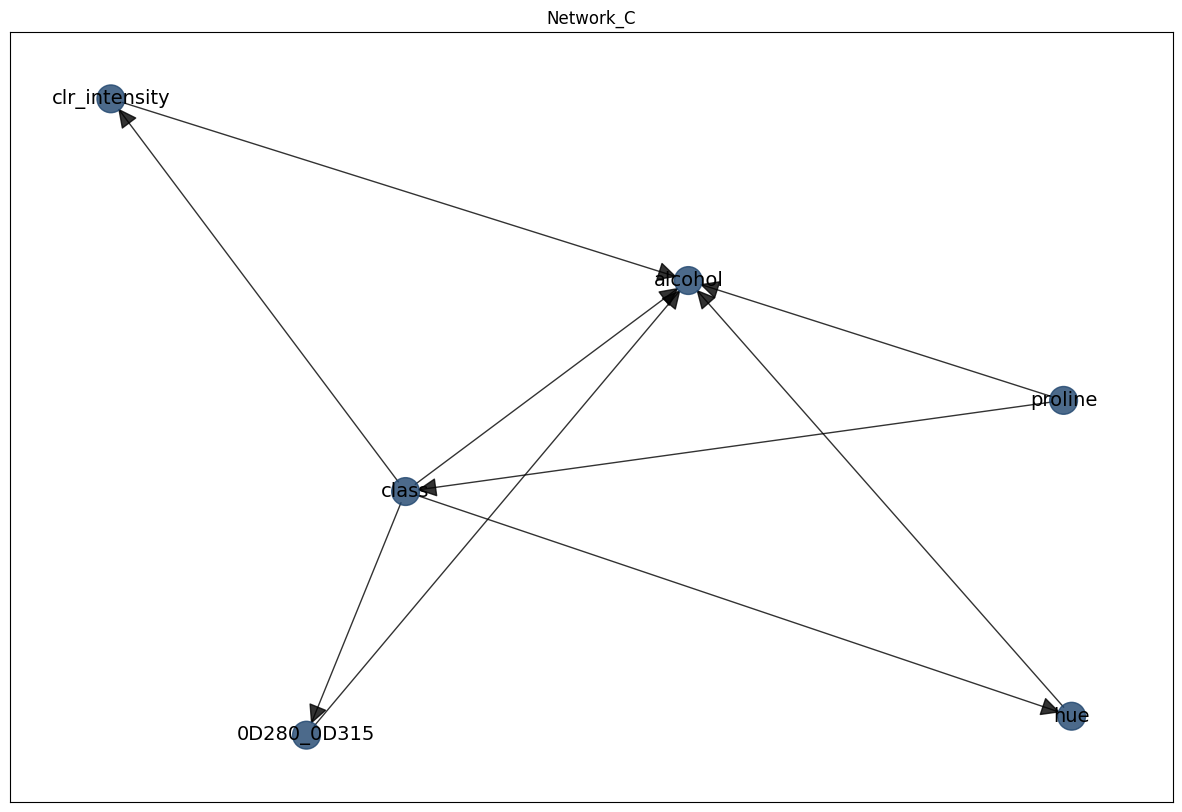

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'alcohol': array([0.10866121, 0.48804975]),
  'clr_intensity': array([-0.66977724,  1.        ]),
  'hue': array([ 0.62532522, -0.73936522]),
  '0D280_0D315': array([-0.40616321, -0.7927499 ]),
  'proline': array([0.61449436, 0.15042329]),
  'class': array([-0.27254033, -0.10635793])},
 'G': <networkx.classes.digraph.DiGraph at 0x19b5d8d0fa0>,
 'node_properties': {'alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'clr_intensity': {'node_color': '#1f456e', 'node_size': 800},
  'hue': {'node_color': '#1f456e', 'node_size': 800},
  '0D280_0D315': {'node_color': '#1f456e', 'node_size': 800},
  'proline': {'node_color': '#1f456e', 'node_size': 800},
  'class': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('clr_intensity', 'alcohol'): {'color': '#000000',
   'weight': 1},
  ('hue', 'alcohol'): {'color': '#000000', 'weight': 1},
  ('0D280_0D315', 'alcohol'): {'color'

In [27]:
# Assuming df is your dataset
C = structure_learning.fit(
    df=dataset_new,
    methodtype='hc',       # TAN (Tree Augmented Naive Bayes)
    class_node='class',     # Specify the target class node
    root_node='alcohol',    # Specify the root node for the tree structure
    scoretype='k2',         # Scoring metric (you can use other metrics like 'bdeu', 'bic', etc.)
)

# Plot the TAN structure
plot(C, node_size=400, title='Network_C')

In [28]:
# Learn Bayesian network parameters
model_C = parameter_learning.fit(model = C, df = dataset_new, scoretype='k2')

bn.print_CPD(model_C,verbose=0)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of clr_intensity:
+--------------------+-----+---------------------+
| class              | ... | class(3.0)          |
+--------------------+-----+---------------------+
| clr_intensity(0.0) | ... | 0.20930232558139536 |
+--------------------+-----+---------------------+
| clr_intensity(1.0) | ... | 0.5116279069767442  |
+--------------------+-----+---------------------+
| clr_intensity(2.0) | ... | 0.27906976744186046 |
+--------------------+-----+---------------------+
[bnlearn] >CPD of alcohol:
+---------------+-----+--------------------+
| 0D280_0D315   | ... | 0D280_0D315(2.0)   |
+---------------+-----+--------------------+
| class         | ... | class(3.0)         |
+---------------+-----+--------------------+
| clr_intensity | ... | clr_intensity(2.0) |
+---------------+

{'clr_intensity':    clr_intensity  class         p
 0            0.0    1.0  0.446809
 1            0.0    2.0  0.950000
 2            0.0    3.0  0.209302
 3            1.0    1.0  0.531915
 4            1.0    2.0  0.033333
 5            1.0    3.0  0.511628
 6            2.0    1.0  0.021277
 7            2.0    2.0  0.016667
 8            2.0    3.0  0.279070,
 'alcohol':      alcohol  0D280_0D315  class  clr_intensity  hue  proline         p
 0        0.0          0.0    1.0            0.0  0.0      0.0  0.333333
 1        0.0          0.0    1.0            0.0  0.0      1.0  0.333333
 2        0.0          0.0    1.0            0.0  0.0      2.0  0.333333
 3        0.0          0.0    1.0            0.0  1.0      0.0  0.333333
 4        0.0          0.0    1.0            0.0  1.0      1.0  0.333333
 ..       ...          ...    ...            ...  ...      ...       ...
 724      2.0          2.0    3.0            2.0  1.0      1.0  0.333333
 725      2.0          2.0    3.0    

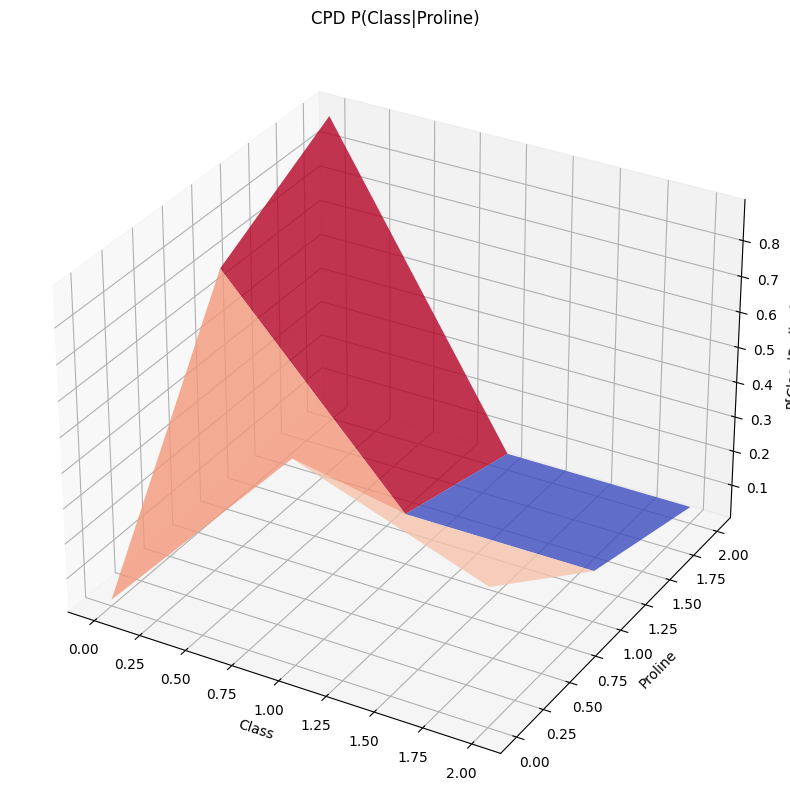

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

cpd_proline_values = np.array([[0.02197802197802198, 0.5824175824175825, 0.3956043956043956],
                                [0.7, 0.15, 0.15], 
                                [0.8947368421052632, 0.05263157894736842, 0.05263157894736842]])
classes = [0, 1, 2]
a_vals = [0, 1, 2]

fig = plt.figure(figsize=(15, 10))
Cl, F1 = np.meshgrid(classes, a_vals)
ax = fig.add_subplot(111, projection='3d')

# Change the color map to 'coolwarm'
ax.plot_surface(Cl, F1, cpd_proline_values, cmap='coolwarm', alpha=0.8)

ax.set_xlabel('Class')
ax.set_ylabel('Proline')
ax.set_zlabel('P[Class|Proline]')
ax.set_title('CPD P(Class|Proline)')
plt.show()


[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


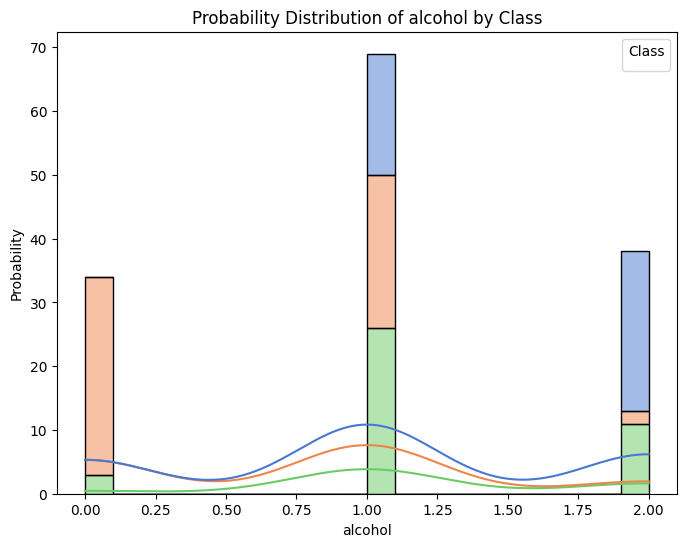

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


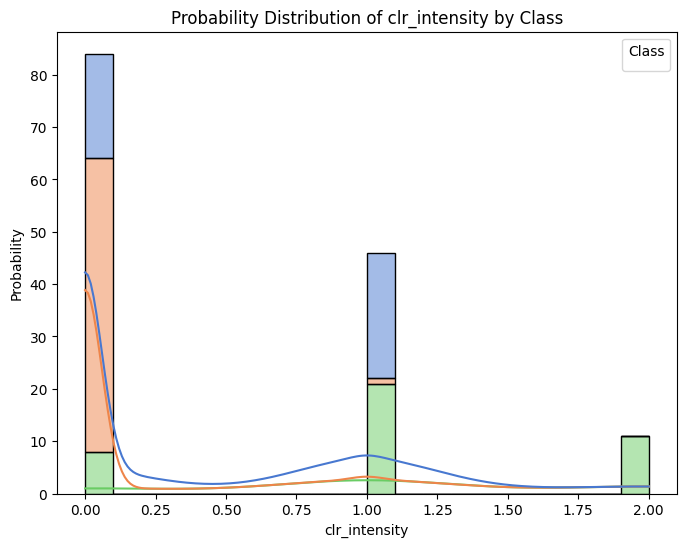

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


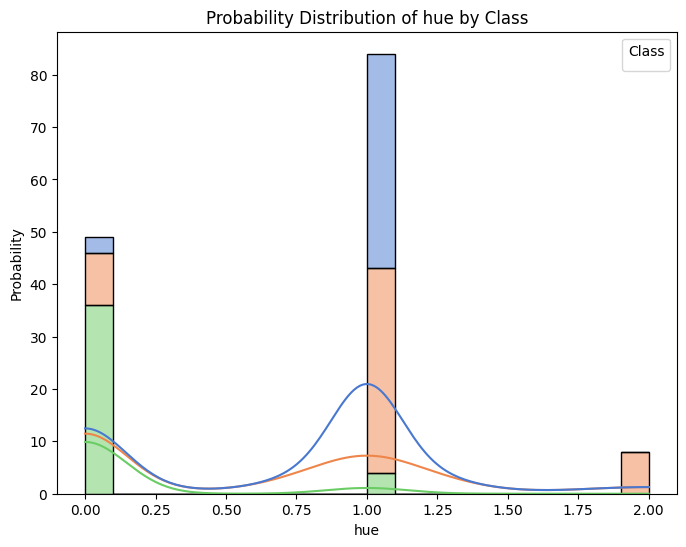

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


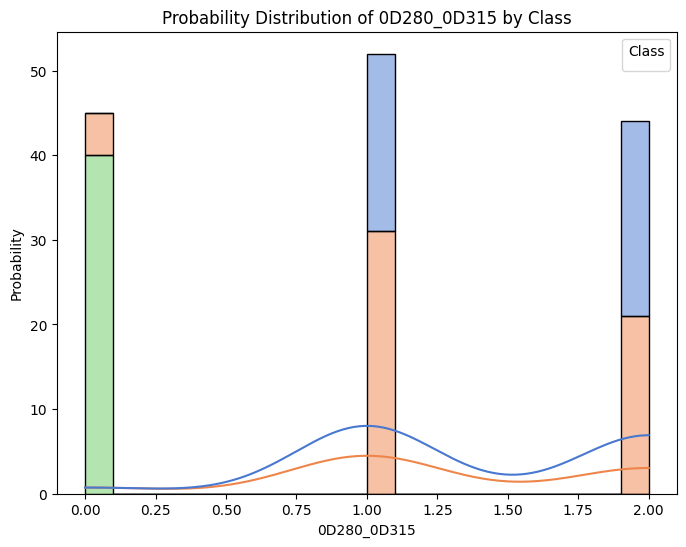

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


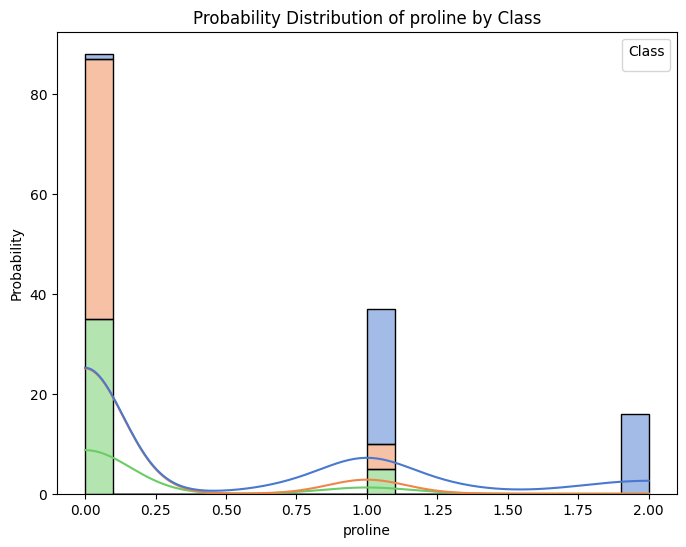

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

for variable in dataset_new.columns:
    if variable != 'class':  # Exclude the target variable
        plt.figure(figsize=(8, 6))

        # Use seaborn for nice probability density plots
        sns.histplot(data=dataset_new, x=variable, hue='class', kde=True, bins=20, multiple="stack", palette="muted")

        plt.title(f'Probability Distribution of {variable} by Class')
        plt.xlabel(variable)
        plt.ylabel('Probability')
        plt.legend(title='Class')
        plt.show()


In [44]:
# Test Sample 1
test_sample_1 = {
    'alcohol': 0.0,
    'malicacid': 1.0,
    'ash': 1.0,
    'alcalinity': 2.0,
    'Mg': 2.0,
    'phenols': 0.0,
    'flav': 0.0,
    'nonflav': 0.0,
    'proantho': 2.0,
    'clr_intensity': 0.0,
    'hue': 1.0,
    '0D280_0D315': 0.0,
    'proline': 1.0
}

true_class_1 = {
    3
}
# Test Sample 2
test_sample_2 = {
    'alcohol': 2.0,
    'malicacid': 1.0,
    'ash': 2.0,
    'alcalinity': 2.0,
    'Mg': 2.0,
    'phenols': 0.0,
    'flav': 0.0,
    'nonflav': 0.0,
    'proantho': 2.0,
    'clr_intensity': 0.0,
    'hue': 0.0,
    '0D280_0D315': 0.0,
    'proline': 0.0
}
true_class_2 = {
    3
}

# Test Sample 3
test_sample_3 = {
    'alcohol': 1.0,
    'malicacid': 0.0,
    'ash': 1.0,
    'alcalinity': 1.0,
    'Mg': 1.0,
    'phenols': 0.0,
    'flav': 1.0,
    'nonflav': 1.0,
    'proantho': 1.0,
    'clr_intensity': 2.0,
    'hue': 0.0,
    '0D280_0D315': 2.0,
    'proline': 1.0
}
true_class_3 = {
    2
}

# Test Sample 4
test_sample_4 = {
    'alcohol': 0.0,
    'malicacid': 1.0,
    'ash': 0.0,
    'alcalinity': 2.0,
    'Mg': 1.0,
    'phenols': 0.0,
    'flav': 1.0,
    'nonflav': 0.0,
    'proantho': 2.0,
    'clr_intensity': 1.0,
    'hue': 2.0,
    '0D280_0D315': 0.0,
    'proline': 0.0
}
true_class_4 = {
    3
}

# Test Sample 5
test_sample_5 = {
    'alcohol': 2.0,
    'malicacid': 2.0,
    'ash': 1.0,
    'alcalinity': 1.0,
    'Mg': 0.0,
    'phenols': 1.0,
    'flav': 2.0,
    'nonflav': 1.0,
    'proantho': 0.0,
    'clr_intensity': 1.0,
    'hue': 0.0,
    '0D280_0D315': 1.0,
    'proline': 2.0
}
true_class_5 = {
    1
}


In [45]:
from pgmpy.inference import VariableElimination

samples = [test_sample_1, test_sample_2, test_sample_3, test_sample_4, test_sample_5]

# Loop through each test sample and perform inference
for sample in samples:
    # Perform inference for the 'class' variable
    print("Model A_1 results")
    result = bn.inference.fit(model=model_A1, variables=['class'], evidence=sample)

for sample in samples:
    # Perform inference for the 'class' variable
    print("Model A_new results")
    result = bn.inference.fit(model=model_A2, variables=['class'], evidence=sample)

for sample in samples:
    # Perform inference for the 'class' variable
    print("Model B results")
    result = bn.inference.fit(model=B, variables=['class'], evidence=sample)


Model A_1 results
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   class |         p |
+====+=========+===========+
|  0 |       1 | 0.0926827 |
+----+---------+-----------+
|  1 |       2 | 0.670127  |
+----+---------+-----------+
|  2 |       3 | 0.237191  |
+----+---------+-----------+
Model A_1 results
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+------------+
|    |   class |          p |
+====+=========+============+
|  0 |       1 | 5.1851e-05 |
+----+---------+------------+
|  1 |       2 | 0.133872   |
+----+---------+------------+
|  2 |       3 | 0.866076   |
+----+---------+------------+
Model A_1 results
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-

In [46]:
from pgmpy.inference import VariableElimination
import numpy as np

# Assuming the true classes for the test samples
true_classes = [true_class_1, true_class_2, true_class_3, true_class_4, true_class_5]

# Initialize confusion matrices for each model
confusion_matrix_A1 = np.zeros((3, 3), dtype=int)
confusion_matrix_Anew = np.zeros((3, 3), dtype=int)
confusion_matrix_B = np.zeros((3, 3), dtype=int)

# Loop through each test sample and perform inference
for i, sample in enumerate(samples):
    # Perform inference for Model A_1
    result_A1 = bn.inference.fit(model=model_A1, variables=['class'], evidence=sample)
    predicted_class_A1 = result_A1.values['class'].idxmax()
    true_class = true_classes[i]
    confusion_matrix_A1[true_class - 1, predicted_class_A1 - 1] += 1

# Loop through each test sample again for Model A_new
for i, sample in enumerate(samples):
    # Perform inference for Model A_new
    result_Anew = bn.inference.fit(model=model_A2, variables=['class'], evidence=sample)
    predicted_class_Anew = result_Anew.values['class'].idxmax()
    true_class = true_classes[i]
    confusion_matrix_Anew[true_class - 1, predicted_class_Anew - 1] += 1

# Loop through each test sample again for Model B
for i, sample in enumerate(samples):
    # Perform inference for Model B
    result_B = bn.inference.fit(model=B, variables=['class'], evidence=sample)
    predicted_class_B = result_B.values['class'].idxmax()
    true_class = true_classes[i]
    confusion_matrix_B[true_class - 1, predicted_class_B - 1] += 1

# Calculate accuracy matrices
accuracy_matrix_A1 = confusion_matrix_A1 / np.sum(confusion_matrix_A1, axis=1, keepdims=True)
accuracy_matrix_Anew = confusion_matrix_Anew / np.sum(confusion_matrix_Anew, axis=1, keepdims=True)
accuracy_matrix_B = confusion_matrix_B / np.sum(confusion_matrix_B, axis=1, keepdims=True)

# Print accuracy matrices
print("Accuracy Matrix for Model A_1:")
print(accuracy_matrix_A1)
print("\nAccuracy Matrix for Model A_new:")
print(accuracy_matrix_Anew)
print("\nAccuracy Matrix for Model B:")
print(accuracy_matrix_B)


[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   class |         p |
+====+=========+===========+
|  0 |       1 | 0.0926827 |
+----+---------+-----------+
|  1 |       2 | 0.670127  |
+----+---------+-----------+
|  2 |       3 | 0.237191  |
+----+---------+-----------+


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices